# 使用自动微分估算简单线性回归的参数(w、b)
## $ y = wx + b$

In [2]:
# 载入套件
import numpy as np 
import torch

## 定义训练函数

In [3]:
def train(X, y, epochs=100, lr=0.0001):
    loss_list, w_list, b_list=[], [], []
    
    # w、b 初始值均设为常态分配之随机乱数 
    w = torch.randn(1, requires_grad=True, dtype=torch.float)
    b = torch.randn(1, requires_grad=True, dtype=torch.float)    
    for epoch in range(epochs):   # 执行训练周期       
        y_pred = w * X + b        # 预测值
        
        # 计算损失函数值
        MSE = torch.square(y - y_pred).mean()        
        MSE.backward()      
        
        # 设定不参与梯度下降，w、b才能运算
        with torch.no_grad():
            # 新权重 = 原权重 — 学习率(learning_rate) * 梯度(gradient)
            w -= lr * w.grad
            b -= lr * b.grad 
        
        # 记录训练结果
        if (epoch+1) % 1000 == 0 or epochs < 1000:
            # detach：与运算图分离，numpy()：转成阵列
            # w.detach().numpy()
            w_list.append(w.item())  # w.item()：转成常数
            b_list.append(b.item())
            loss_list.append(MSE.item())
        
        # 梯度重置
        w.grad.zero_()
        b.grad.zero_()
        
    return w_list, b_list, loss_list

## 产生随机资料

In [4]:
# 产生线性随机资料100笔，介于 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 资料加一点杂讯(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 执行训练

In [93]:
# 执行训练
w_list, b_list, loss_list = train(torch.tensor(X), torch.tensor(y))

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9762612581253052, b=0.052471742033958435


In [7]:
# 执行训练
w_list, b_list, loss_list = train(torch.tensor(X), torch.tensor(y), epochs=100000)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9177446961402893, b=-0.2882246971130371


## 以NumPy验证

In [94]:
# 执行训练
coef = np.polyfit(X, y, deg=1)

# 取得 w、b 的最佳解
print(f'w={coef[0]}, b={coef[1]}')

w=0.8510051491073364, b=4.517198474698629


In [95]:
from sklearn.linear_model import LinearRegression

X2 = X.reshape(X.shape[0], 1)

lr = LinearRegression()
lr.fit(X2, y)

lr.coef_[0], lr.intercept_

(0.8510051491073363, 4.517198474698631)

## 显示回归线

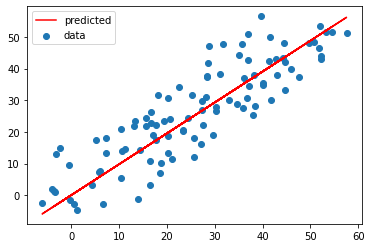

In [96]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()

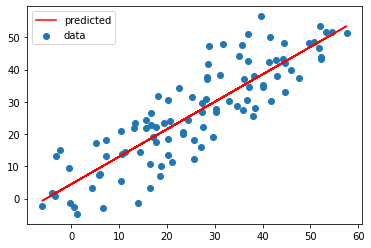

In [97]:
# NumPy 求得的回归线
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, coef[0] * X + coef[1], 'r-', label='predicted')
plt.legend()

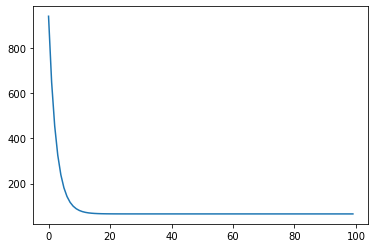

In [81]:
# 损失函数绘图
plt.plot(loss_list)

In [98]:
loss_list

[940.5437194191467,
 649.3575966096452,
 455.08293443499934,
 325.46593524599365,
 238.98747800993524,
 181.29027375372272,
 142.79545797804457,
 117.11215862727774,
 99.9764877177133,
 88.54364940984883,
 80.91564846722181,
 75.8261669322988,
 72.4303372929976,
 70.16448544042386,
 68.65253650128123,
 67.64357899932804,
 66.97021329635093,
 66.52074205601653,
 66.22065307106367,
 66.02022909677879,
 65.88630032900183,
 65.79673489252502,
 65.73676905716735,
 65.69655037304292,
 65.6695079149226,
 65.65125553775262,
 65.63886819473771,
 65.63039382904215,
 65.62453026409904,
 65.62040856557353,
 65.61744882324777,
 65.61526455228096,
 65.61359767486752,
 65.61227598453247,
 65.61118462854371,
 65.61024691289745,
 65.609411787146,
 65.60864510711467,
 65.60792410917729,
 65.60723365143218,
 65.60656354524542,
 65.60590706999612,
 65.60525970355945,
 65.60461843232973,
 65.60398125517247,
 65.60334683919481,
 65.60271428186233,
 65.60208299572443,
 65.60145257281084,
 65.6008227533585,
 

In [99]:
w_list

[0.17896035313606262,
 0.3251361548900604,
 0.4445331394672394,
 0.5420567989349365,
 0.6217141151428223,
 0.6867779493331909,
 0.7399216294288635,
 0.7833287715911865,
 0.8187829852104187,
 0.8477411270141602,
 0.8713932037353516,
 0.89071124792099,
 0.9064891934394836,
 0.9193755388259888,
 0.9298999905586243,
 0.9384951591491699,
 0.9455145597457886,
 0.9512467980384827,
 0.9559276700019836,
 0.9597497582435608,
 0.9628704190254211,
 0.9654181003570557,
 0.9674978256225586,
 0.9691952466964722,
 0.9705804586410522,
 0.9717106223106384,
 0.9726324677467346,
 0.9733841419219971,
 0.9739968180656433,
 0.9744960069656372,
 0.9749024510383606,
 0.9752331376075745,
 0.9755019545555115,
 0.975720226764679,
 0.9758972525596619,
 0.9760405421257019,
 0.9761562943458557,
 0.9762495756149292,
 0.9763244390487671,
 0.9763843417167664,
 0.9764319658279419,
 0.9764695763587952,
 0.9764990210533142,
 0.9765217900276184,
 0.9765390753746033,
 0.97655189037323,
 0.9765610694885254,
 0.97656732797622